## cdasws Example Jupyter Notebook
This [notebook](https://jupyter.org) demonstrates using the [cdasws](https://pypi.org/project/cdasws) to access data from [cdaweb](https://cdaweb.gsfc.nasa.gov) with the data returned in the [xarray.Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html).  Alternatively, it is possible to have the data returned in an  [SpasePy data model](https://spacepy.github.io/datamodel.html).  For SpasePy data model results, see this [notebook](CdasWsExample.html) ([ipynb file](CdasWsExample.ipynb)).

**Notes**: 
1. This example only depends upon pure Python modules and does not require modules that depend upon non-Python code (such as spacepy and pycdf).
2. The use of the dataRepresentation keyword parameter below is only necessary if you also have [spacepy](https://pypi.org/project/spacepy) installed.

### Prerequisites
Install the following prerequisite modules if they are not already installed.

In [19]:
#%pip install xarray
#%pip install cdflib
#%pip install cdasws

### Setup

In [1]:
from cdasws import CdasWs
from cdasws.datarepresentation import DataRepresentation
import matplotlib.pyplot as plt
cdas = CdasWs()

### Get Observatory Groups
The following code demonstrates how to get the available observatory groups.

In [3]:
obs_groups = cdas.get_observatory_groups()
for index, obs_group in enumerate(obs_groups):
    print(obs_group['Name'])
    if index == 5:
        break

ACE
AMPTE
ARTEMIS
Alouette
Apollo
Arase (ERG)


### Get Intrument Types
The following code demonstrates how to get the available instrument types.

In [5]:
instr_types = cdas.get_instrument_types()
for index, instr_type in enumerate(instr_types):
    print(instr_type['Name'])
    if index == 5:
        break

Activity Indices
Electric Fields (space)
Electron Precipitation Bremsstrahlung
Energetic Particle Detector
Engineering
Ephemeris/Attitude/Ancillary


### Get Datasets
The following code demontrates how to get a list of datasets.

In [21]:
datasets = cdas.get_datasets(observatoryGroup='ACE',
                             instrumentType='Magnetic Fields (space)')
for index, dataset in enumerate(datasets):
    print(dataset['Id'], dataset['Label'])
    if index == 5:
        break

AC_AT_DEF ACE Hourly RTN, GSE and J2000 GCI Attitude direction cosines - E. C. Stone (California Institute of Technology)
AC_H0_MFI H0 - ACE Magnetic Field 16-Second Level 2 Data - N. Ness (Bartol Research Institute)
AC_H1_MFI H1 - ACE Magnetic Field 4-Minute Level 2 Data - N. Ness (Bartol Research Institute)
AC_H2_MFI H2 - ACE Magnetic Field 1-Hour Level 2 Data - N. Ness (Bartol Research Institute)
AC_H3_MFI H3 - ACE Magnetic Field 1-Second Level 2 Data - N. Ness (Bartol Research Institute)
AC_K0_GIFWALK Links to ACE KP pre-generated survey and other plots - Polar-Wind-Geotail Ground System (NASA GSFC)


### Get Dataset Variables
The following code demonstrates how to get a dataset's variables.

In [22]:
variables = cdas.get_variables('AC_H1_MFI')
for variable in variables:
    print(variable['Name'], variable['LongDescription'])

Magnitude B-field magnitude
BGSEc Magnetic Field Vector in GSE Cartesian coordinates (4 min)
BGSM Magnetic field vector in GSM coordinates (4 min)
SC_pos_GSE ACE s/c position, 3 comp. in GSE coord.
SC_pos_GSM ACE s/c position, 3 comp. in GSM coord.


### Get Data Example
The following code demonstrates how to access magnetic field measurements
from the [ACE mission dataset](https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H1_MFI) using the cdasws package in a [Jupyter notebook](https://jupyter.org/).

In [23]:
data = cdas.get_data('AC_H1_MFI', ['Magnitude', 'BGSEc'],
                     '2009-06-01T00:00:00Z', '2009-06-01T00:10:00Z',
                     dataRepresentation = DataRepresentation.XARRAY)[1]
print(data)

<xarray.Dataset>
Dimensions:    (Epoch: 3, cartesian: 3)
Coordinates:
  * Epoch      (Epoch) datetime64[ns] 2009-06-01 ... 2009-06-01T00:08:00
  * cartesian  (cartesian) <U11 'x_component' 'y_component' 'z_component'
    metavar0   (cartesian) <U6 'Bx GSE' 'By GSE' 'Bz GSE'
Data variables:
    Magnitude  (Epoch) float32 3.495 3.474 3.477
    BGSEc      (Epoch, cartesian) float32 -0.106 2.521 -2.391 ... 2.309 -2.587
Attributes:
    TITLE:                       ACE> Magnetometer Parameters
    Project:                     ISTP>International Solar-Terrestrial Physics
    Discipline:                  Space Physics>Interplanetary Studies
    Source_name:                 AC>Advanced Composition Explorer
    Data_type:                   H1>4-Min Level 2 Data
    Descriptor:                  MAG>ACE Magnetic Field Instrument
    DATA_VERSION:                n
    GENERATED_BY:                ACE Science Center
    GENERATION_DATE:             88880131
    LINK_TEXT:                   Release n

### Display Metadata

To display metadata for the Magnitude variable, do

In [24]:
print(data.Magnitude)

<xarray.DataArray 'Magnitude' (Epoch: 3)>
array([3.495, 3.474, 3.477], dtype=float32)
Coordinates:
  * Epoch    (Epoch) datetime64[ns] 2009-06-01 ... 2009-06-01T00:08:00
Attributes:
    FIELDNAM:       B-field magnitude
    VALIDMIN:       [0.]
    VALIDMAX:       [500.]
    SCALEMIN:       [0.]
    SCALEMAX:       [10.]
    UNITS:          nT
    FORMAT:         F8.3
    VAR_TYPE:       data
    DICT_KEY:       magnetic_field>magnitude
    FILLVAL:        [-1.e+31]
    DEPEND_0:       Epoch
    CATDESC:        B-field magnitude
    LABLAXIS:       <|B|>
    DISPLAY_TYPE:   time_series
    DIM_SIZES:      [0]
    standard_name:  B-field magnitude
    units:          nT
    long_name:      <|B|>


### Plot Values

To plot the Magnitude values using the label values from the metadata, do

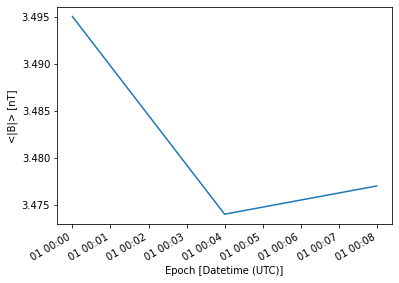

In [25]:
data['Magnitude'].plot()

### Binning Example
For analysis, it is often useful to place two datasets that have different timestamps on the same time grid.  The following demonstrates doing this with cdasws and the datasets [AC_H0_SWE](https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H0_SWE) and [AC_H2_SWE](https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H2_SWE).  For more information on binning, see [binning in cdaweb](https://cdaweb.gsfc.nasa.gov/CDAWeb_Binning_readme.html).

#### Display Original Data
Get and display the data.

In [26]:
    dataset0 = 'AC_H0_SWE'
    parameters = ['Np']
    start = '1998-02-04T00:00:00Z'
    stop = '1998-02-06T00:00:00Z'
    status, data0 = cdas.get_data(dataset0, parameters, start, stop,
                     dataRepresentation = DataRepresentation.XARRAY)
    print(data0.Np)
    dataset1 = 'AC_H2_SWE'
    status, data1 = cdas.get_data(dataset1, parameters, start, stop,
                     dataRepresentation = DataRepresentation.XARRAY)
    print(data1.Np)

<xarray.DataArray 'Np' (Epoch: 2700)>
array([    nan,     nan,     nan, ..., 14.4819, 14.9483, 13.5783],
      dtype=float32)
Coordinates:
  * Epoch    (Epoch) datetime64[ns] 1998-02-04T00:00:31 ... 1998-02-05T23:59:27
Attributes:
    FIELDNAM:       Proton No. density
    VALIDMIN:       [0.]
    VALIDMAX:       [200.]
    SCALEMIN:       [0.]
    SCALEMAX:       [100.]
    LABLAXIS:       H_Density
    UNITS:          #/cc
    VAR_TYPE:       data
    FORMAT:         F8.4
    FILLVAL:        [-1.e+31]
    DEPEND_0:       Epoch
    DICT_KEY:       density>
    CATDESC:        Solar Wind Proton Number Density, scalar
    DISPLAY_TYPE:   time_series
    VAR_NOTES:      Np is the proton number density in units of cm-3, as calc...
    DIM_SIZES:      [0]
    standard_name:  Proton No. density
    long_name:      H_Density
    units:          #/cc
<xarray.DataArray 'Np' (Epoch: 49)>
array([    nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     

#### Bin Data
Bin the data with 60 second interval and interpolate any missing values.

In [27]:
    binData = {
        'interval': 60.0,
        'interpolateMissingValues': True,
        'sigmaMultiplier': 4
    }
    status, data0 = cdas.get_data(dataset0, parameters, start, stop,
                     dataRepresentation = DataRepresentation.XARRAY, binData=binData)
    print(data0.Np)
    status, data1 = cdas.get_data(dataset1, parameters, start, stop,
                     dataRepresentation = DataRepresentation.XARRAY, binData=binData)
    print(data1.Np)

<xarray.DataArray 'Np' (Epoch_bin: 2880)>
array([16.3343, 16.3343, 16.3343, ..., 14.4819, 14.9483, 13.5783],
      dtype=float32)
Coordinates:
  * Epoch_bin               (Epoch_bin) datetime64[ns] 1998-02-04T00:00:30 .....
    NP_BIN_DELTA_MINUS_VAR  (Epoch_bin) float32 nan nan nan nan ... nan nan nan
    NP_BIN_DELTA_PLUS_VAR   (Epoch_bin) float32 nan nan nan nan ... nan nan nan
Attributes:
    FIELDNAM:         Proton No. density
    VALIDMIN:         [0.]
    VALIDMAX:         [200.]
    SCALEMIN:         [0.]
    SCALEMAX:         [100.]
    LABLAXIS:         H_Density
    UNITS:            #/cc
    VAR_TYPE:         data
    FORMAT:           F8.4
    FILLVAL:          [-1.e+31]
    DEPEND_0:         Epoch_bin
    DICT_KEY:         density>
    CATDESC:          Solar Wind Proton Number Density, scalar
    DELTA_PLUS_VAR:   NP_BIN_DELTA_PLUS_VAR
    DELTA_MINUS_VAR:  NP_BIN_DELTA_MINUS_VAR
    DISPLAY_TYPE:     time_series
    VAR_NOTES:        Np is the proton number density in 

### Compare Data
Compare the binned data from the two datasets.

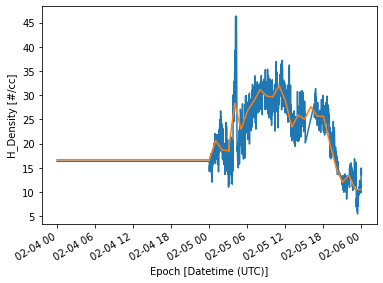

In [28]:
data0['Np'].plot()
data1['Np'].plot()

### DOI Example
To get data from a dataset with a [digital object identifier](https://en.wikipedia.org/wiki/Digital_object_identifier) do the following: 

In [29]:
status, data = cdas.get_data('10.21978/P8PG8V', ['BT'], 
                             '1987-09-24T00:00:00Z', '1987-09-25T00:00:00Z',
                            dataRepresentation = DataRepresentation.XARRAY)
print(data.BT)

<xarray.DataArray 'BT' (Epoch: 15024)>
array([89.8591, 89.7978, 89.7269, ..., 18.5909, 18.6276, 18.5359],
      dtype=float32)
Coordinates:
  * Epoch    (Epoch) datetime64[ns] 1987-09-24T00:30:01.567000 ... 1987-09-24...
Attributes:
    FIELDNAM:       BTOT
    CATDESC:        Total Magnetic Field: 12-sec avg at 4-sec intervals
    DEPEND_0:       Epoch
    DISPLAY_TYPE:   time_series
    FILLVAL:        [-1.e+31]
    FORMAT:         F9.2
    LABLAXIS:       BTOT (SC)
    UNITS:          nT
    VALIDMIN:       [0.01]
    VALIDMAX:       [40000.]
    VAR_TYPE:       data
    SCALETYP:       linear
    DIM_SIZES:      [0]
    standard_name:  BTOT
    long_name:      BTOT (SC)
    units:          nT


### Additional Documentation

View the [cdasws API](https://cdaweb.gsfc.nasa.gov/WebServices/REST/py/cdasws/) for additional functions.  Additional [notebook examples](https://cdaweb.gsfc.nasa.gov/WebServices/REST/#Jupyter_Notebook_Examples) are also available.